# Road Safety Data for the UK

#### The Data
The [files](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) provide detailed road safety data about the circumstances of personal injury road accidents in GB, the types (including Make and Model) of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. The files used here span 2013 to 2017.

#### The Task
The purpose of the analysis is 
- To summarize the main characteristics of the data, and obtain interesting facts that are worth highlighting.
- Identity and quantify associations (if any) between the number of causalities (in the Accidents table) and other variables in the data set.
- Explore whether it is possible to predict accident hotspots based on the data.

#### The OSEMiN-approach

The OSEMiN Process is an acronym that rhymes with “awesome” and stands for **Obtain, Scrub, Explore, Model, and iNterpret**. It can be used as a blueprint for working on data problems using machine learning tools. Preprocessing involves scrubbing (also called cleaning) and exploring the data. Building the model, evaluating, and optimizing it make up the process of machine learning.

# Table of Contents
<a id='Table of Contents'></a>

### <a href='#1. Obtaining and Viewing the Data'>1. Obtaining and Viewing the Data</a>

### <a href='#2. Preprocessing the Data'>2. Preprocessing the Data</a>

* <a href='#2.1. Converting Datetime Column'>2.1. Converting Datetime Column</a>
* <a href='#2.2. Handling Missing Values'>2.2. Handling Missing Values</a>

### <a href='#3. Exploratory Data Analysis (EDA)'>3. Exploratory Data Analysis (EDA)</a>

* <a href='#3.1. Main Characteristics of Accidents'>3.1. Main Characteristics of Accidents</a>
* <a href='#3.2. Main Characteristics of Casualties'>3.2. Main Characteristics of Casualties</a>
* <a href='#3.3. Main Characteristics of Vehicles'>3.3. Main Characteristics of Vehicles</a>

### <a href='#4. Modeling the Data'>4. Modeling the Data</a>

* <a href='#4.1. Preparing the Data'>4.1. Preparing the Data</a>
* <a href='#4.2. Random Forest Classifier'>4.2. Random Forest Classifier</a>
* <a href='#4.3. Support Vector Classification'>4.3. Support Vector Classification</a>

### 1. Obtaining and Viewing the Data
<a id='1. Obtaining and Viewing the Data'></a>

In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

**Accidents 2013-2017**

*To get some ideas on how to elegantly read in multiple files in pandas, check this [link](https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688).*

In [2]:
accidents = pd.concat([pd.read_csv(f, compression='zip', 
                                   low_memory=False) for f in glob.glob('data/*Accidents*.zip')])
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Records: 691641 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [3]:
#accidents.info()

The combined accidents table that now spans 5 years contains almost 692.000 records and 32 columns, with only very few missing values. If we decided to work with date and/or time, we will need to convert the string values into datetime format. Besides that, almost all data is properly stored as numeric data.

**Casualties 2013-2017**

In [4]:
# renaming the index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip', index=False)

In [5]:
casualties = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Casualties*.zip')], 
                       sort=True)
print('Records:', casualties.shape[0], '\nColumns:', casualties.shape[1])
casualties.head()

Records: 916713 
Columns: 16


,Accident_Index,Age_Band_of_Casualty,Age_of_Casualty,Bus_or_Coach_Passenger,Car_Passenger,Casualty_Class,Casualty_Home_Area_Type,Casualty_IMD_Decile,Casualty_Reference,Casualty_Severity,Casualty_Type,Pedestrian_Location,Pedestrian_Movement,Pedestrian_Road_Maintenance_Worker,Sex_of_Casualty,Vehicle_Reference
0,201301BS70003,7,NaN,0,0,1,1,NaN,1,2,1,0,0,0,1,2
1,201301BS70005,6,NaN,0,0,1,1,NaN,1,3,3,0,0,0,2,1
2,201301BS70005,4,NaN,0,0,3,1,NaN,2,3,0,1,1,2,2,1
3,201301BS70006,10,NaN,4,0,2,1,NaN,1,3,11,0,0,0,1,1
4,201301BS70007,7,NaN,0,0,1,1,NaN,1,3,3,0,0,0,1,1


In [6]:
#casualties.info()

The combined casualties table has roughly 917,000 with 16 columns providing detailed information about the casualties. The data is almost complete, with missing values only in the `age_of_casualty` and `Casualty_IMD_Decile` columns. Apart from the index, all data is stored in a numeric format.

**Vehicles 2013-2017**

In [7]:
# renaming the index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip', index=False)

In [8]:
vehicles = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Vehicles*.zip')], 
                     sort=True)
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head()

Records: 1270711 
Columns: 23


,1st_Point_of_Impact,Accident_Index,Age_Band_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_(CC),Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_IMD_Decile,Vehicle_Leaving_Carriageway,Vehicle_Location-Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?
0,1,201301BS70003,8,NaN,10,1,8,2402,0,0,...,1,0,0,NaN,0,0,6,1,8,1
1,1,201301BS70003,7,NaN,-1,1,8,-1,0,0,...,1,0,0,NaN,0,0,18,2,1,1
2,1,201301BS70005,6,NaN,5,1,4,124,0,0,...,2,0,0,NaN,0,0,18,1,3,1
3,0,201301BS70006,8,NaN,-1,1,1,-1,0,0,...,1,0,0,NaN,0,0,14,1,11,1
4,4,201301BS70007,7,NaN,7,1,4,124,0,0,...,1,0,0,NaN,0,0,4,1,3,1


In [9]:
#vehicles.info()

The vehicles table is the largest of all three and contains roughly 1.270.000 records spanned over 23 columns with detailed information about the vehicle and its driver. We face missing values in the exact same columns as before: `Age_of_Driver` as well as `Vehicle_IMD_Decile`.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 2. Preprocessing the Data
<a id='2. Preprocessing the Data'></a>

#### 2.1. Converting Datetime Column
<a id='2.1. Converting Datetime Column'></a>

We had our `Date` columnwith values not properly stored in the correct format. Let's do this now:

In [10]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%d/%m/%Y")

In [11]:
#accidents.info()

#### 2.2. Handling Missing Values
<a id='2.2. Handling Missing Values'></a>

In [12]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table: 0.063 %


In [13]:
#accidents.isna().sum()

In [14]:
print('Proportion of Missing Values in Casualties Table:', 
      round(casualties.isna().sum().sum()/len(casualties),3), '%')

Proportion of Missing Values in Casualties Table: 0.613 %


In [15]:
print('Proportion of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Proportion of Missing Values in Vehicles Table: 0.609 %


The last two dataframes have far too many missing values to even think about dropping them. But the first one only contains 6% missing values and it might be helpful to not mess up later analysis with NaN's. Let's drop them:

In [16]:
accidents.dropna(inplace=True)
# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 3. Exploratory Data Analysis (EDA)
<a id='3. Exploratory Data Analysis (EDA)'></a>

#### 3.1. Main Characteristics of Accidents 
<a id='3.1. Main Characteristics of Accidents'></a>

***Has the number of accidents increased or decreased over the last years?***

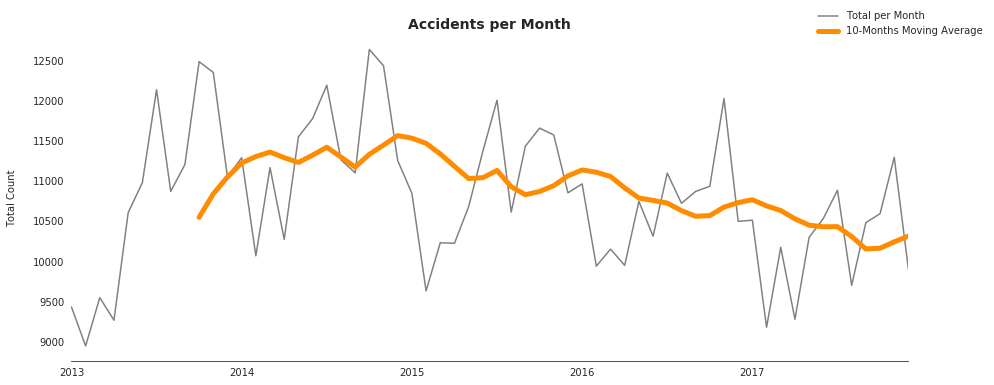

In [17]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('Date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
accidents.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

*The trend is decreasing!*

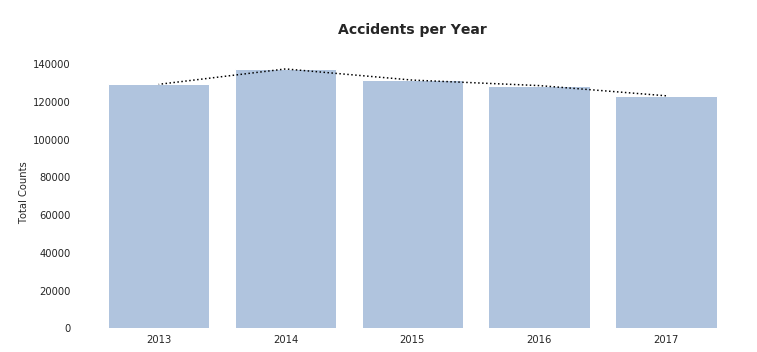

In [18]:
yearly_count = accidents['Date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='lightsteelblue')
ax.plot(yearly_count, linestyle=':', color='black')
ax.set_title('\nAccidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

***Which weekdays are most likely to cause accidents?***

In [19]:
weekday_counts = pd.DataFrame(accidents.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']
#weekday_counts

weekday = weekday_counts['Date'].dt.weekday_name
#weekday

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)

weekday_averages

,Average_Accidents
Weekday,
Friday,406.015326
Monday,354.219231
Saturday,322.938697
Sunday,272.950192
Thursday,377.839080
Tuesday,376.019157
Wednesday,374.727969


In [20]:
weekday_averages

,Average_Accidents
Weekday,
Friday,406.015326
Monday,354.219231
Saturday,322.938697
Sunday,272.950192
Thursday,377.839080
Tuesday,376.019157
Wednesday,374.727969


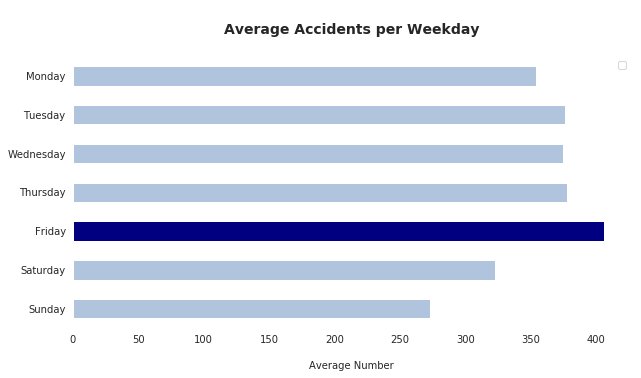

In [21]:
# reorder the weekdays beginning with Monday (backwards because of printing behavior!)
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 
        'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number', ylabel='')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

In [22]:
weekday = accidents['Date'].dt.weekday_name
year    = accidents['Date'].dt.year

accident_table = accidents.groupby([year, weekday]).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2013,13832,16727,21420,19678,19073,19716,18450
2014,14939,17732,22400,20413,20783,20943,19835
2015,14227,16876,20899,20131,20071,20144,18796
2016,14104,16694,21224,19658,19581,18904,18067
2017,14138,16258,20027,18736,18296,18434,16949


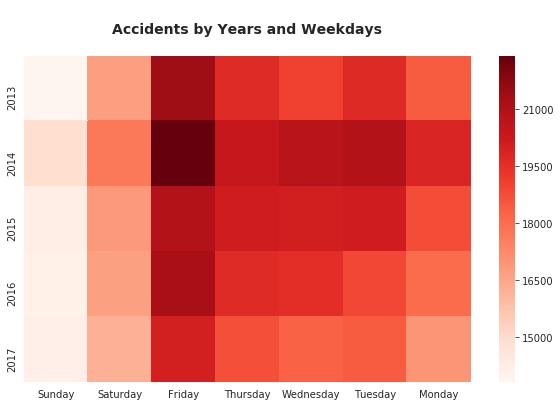

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

*Across all years, Sundays are the safest of all weekdays while Fridays are the most dangerous!*

***How are accidents related to weather conditions?***

In [24]:
weather_table = accidents.set_index('Date').sort_index()\
                                           .groupby(['Weather_Conditions', pd.Grouper(freq='Y')])\
                                           .size()\
                                           .unstack('Weather_Conditions')
weather_table

Weather_Conditions,-1,1,2,3,4,5,6,7,8,9
Date,,,,,,,,,,
2013-12-31,NaN,104955.0,13174.0,1536.0,1698.0,1904.0,435.0,581.0,2261.0,2352.0
2014-12-31,NaN,112025.0,16027.0,185.0,1430.0,2096.0,51.0,711.0,2159.0,2361.0
2015-12-31,NaN,107549.0,14145.0,417.0,2160.0,1986.0,118.0,626.0,1831.0,2312.0
2016-12-31,9.0,105812.0,13219.0,260.0,1148.0,1221.0,56.0,719.0,2113.0,3675.0
2017-12-31,1.0,99229.0,13195.0,562.0,1148.0,1014.0,87.0,593.0,2554.0,4455.0


In [25]:
# change the index values to only the year
weather_table.index = pd.to_datetime(weather_table.index, format='%Y-%m-%d').year

# replace the weather conditions' values with explanation
weather_table.columns = ['Data Missing', 'Fine no high winds', 'Raining no high winds', 'Snowing no high winds',
                        'Fine + high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist',
                        'Other', 'Unknown']
weather_table

,Data Missing,Fine no high winds,Raining no high winds,Snowing no high winds,Fine + high winds,Raining + high winds,Snowing + high winds,Fog or mist,Other,Unknown
Date,,,,,,,,,,
2013,NaN,104955.0,13174.0,1536.0,1698.0,1904.0,435.0,581.0,2261.0,2352.0
2014,NaN,112025.0,16027.0,185.0,1430.0,2096.0,51.0,711.0,2159.0,2361.0
2015,NaN,107549.0,14145.0,417.0,2160.0,1986.0,118.0,626.0,1831.0,2312.0
2016,9.0,105812.0,13219.0,260.0,1148.0,1221.0,56.0,719.0,2113.0,3675.0
2017,1.0,99229.0,13195.0,562.0,1148.0,1014.0,87.0,593.0,2554.0,4455.0


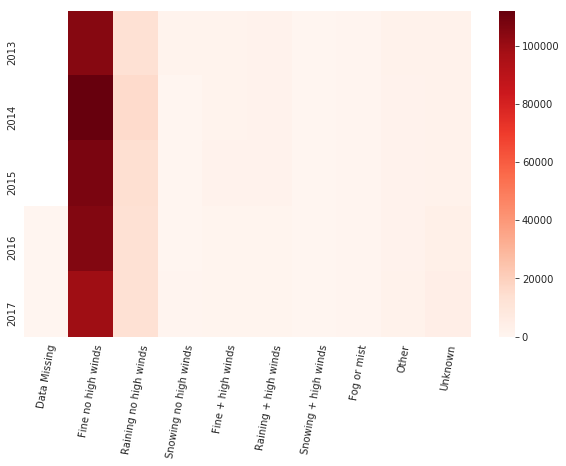

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(weather_table, cmap='Reds')

# rotate xticks for better readability
plt.xticks(rotation=80)
plt.ylabel('');

In [27]:
# bubble plot would be nice...

*Fine weather without any special conditions causes by far most of the accidents!*

***What percentage of each type of accident severity do we have?***

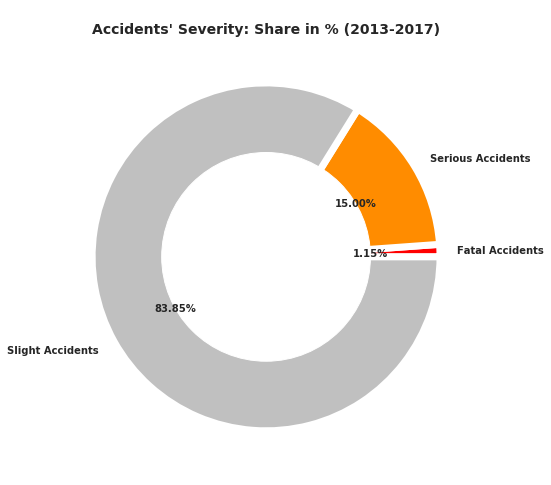

In [28]:
# assign the data
fatal   = accidents.Accident_Severity.value_counts()[1]
serious = accidents.Accident_Severity.value_counts()[2]
slight  = accidents.Accident_Severity.value_counts()[3]

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccidents\' Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()

***How have fatalities developed over years?***

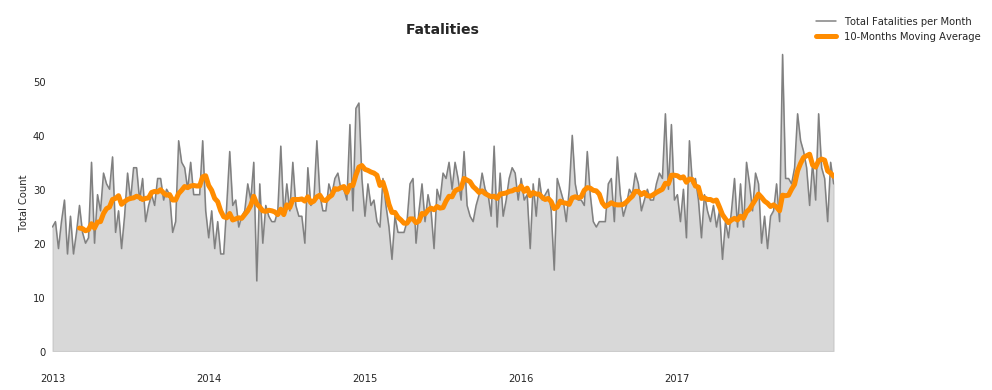

In [29]:
# set the criterium to slice the fatalaties
criteria = accidents['Accident_Severity']==1
# create a new dataframe
weekly_fatalities = accidents.loc[criteria].set_index('Date').sort_index().resample('W').size()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

# plot
weekly_fatalities.plot(label='Total Fatalities per Month', color='grey', ax=ax)
plt.fill_between(x=weekly_fatalities.index, y1=weekly_fatalities.values, color='grey', alpha=0.3)
weekly_fatalities.rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('\nFatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Count', xlabel='')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

***Is the share of fatal accidents increasing or decreasing?***

In [30]:
sub_df = accidents[['Date', 'Accident_Index', 'Accident_Severity']]

# pull out the year
year = sub_df['Date'].dt.year
week = sub_df['Date'].dt.week

# groupby year and severities
count_of_fatalities = sub_df.set_index('Date').groupby([pd.Grouper(freq='W'), 'Accident_Severity']).size()

# build a nice table
fatalities_table = count_of_fatalities.rename_axis(['Week', 'Accident_Severity'])\
                                      .unstack('Accident_Severity')\
                                      .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
fatalities_table.head()

Accident_Severity,fatal,serious,slight
Week,,,
2013-01-06,23,234,1198
2013-01-13,24,324,2086
2013-01-20,19,231,1890
2013-01-27,24,206,1662
2013-02-03,28,340,2117


In [31]:
fatalities_table['sum'] = fatalities_table.sum(axis=1)
fatalities_table = fatalities_table.join(fatalities_table.div(fatalities_table['sum'], axis=0), rsuffix='_percentage')
fatalities_table.head()

Accident_Severity,fatal,serious,slight,sum,fatal_percentage,serious_percentage,slight_percentage,sum_percentage
Week,,,,,,,,
2013-01-06,23,234,1198,1455,0.015808,0.160825,0.823368,1.0
2013-01-13,24,324,2086,2434,0.009860,0.133114,0.857025,1.0
2013-01-20,19,231,1890,2140,0.008879,0.107944,0.883178,1.0
2013-01-27,24,206,1662,1892,0.012685,0.108879,0.878436,1.0
2013-02-03,28,340,2117,2485,0.011268,0.136821,0.851911,1.0


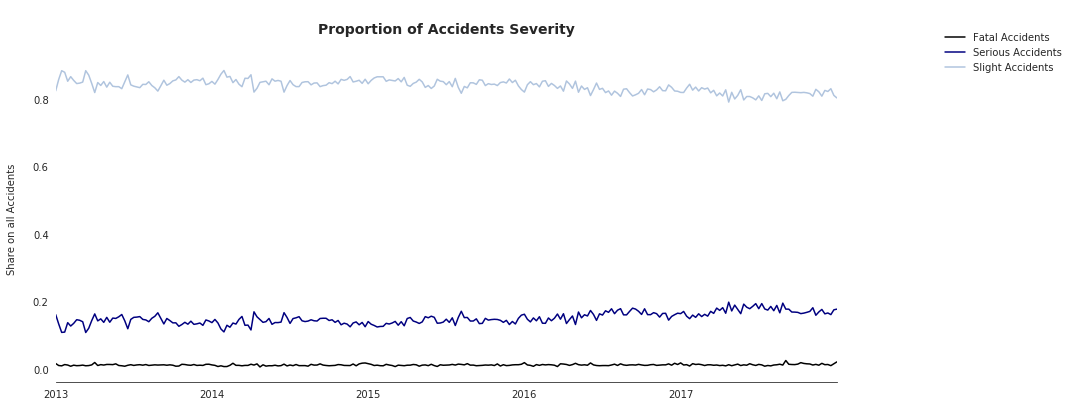

In [32]:
# prepare data
sub_df = fatalities_table[['fatal_percentage', 'serious_percentage', 'slight_percentage']]

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))
colors=['black', 'navy', 'lightsteelblue']

# plot
sub_df.plot(color=colors, ax=ax)
ax.set_title('\nProportion of Accidents Severity\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Share on all Accidents\n', xlabel='')
ax.legend(labels=['Fatal Accidents', 'Serious Accidents', 'Slight Accidents'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=False);

*The trend for fatal accidents seems to stagnate.*

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.2. Main Characteristics of Casualties 
<a id='3.2. Main Characteristics of Casualties'></a>

In [33]:
#casualties.describe().T

***What is the most frequent casualties' age?***

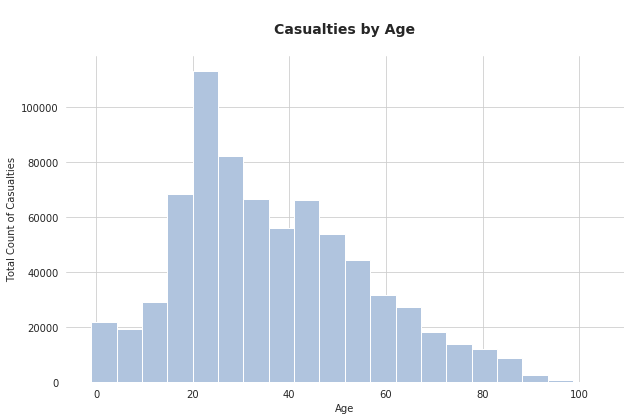

In [34]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
casualties.Age_of_Casualty.hist(bins=20, ax=ax, color='lightsteelblue')
ax.set_title('\nCasualties by Age\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Age', ylabel='Total Count of Casualties')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

*A large number of young people get injured!*

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.3. Main Characteristics of Vehicles 
<a id='3.3. Main Characteristics of Vehicles'></a>

In [35]:
#vehicles.describe().T

***What age and sex have most accident cars' drivers?***

In [36]:
# create a new dataframe
drivers = vehicles.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

# drop the values that have no value
drivers.drop(drivers[(drivers['Age_Band_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == 3)]\
                     .index, axis=0, inplace=True)
# rename the columns
drivers.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']

# rename the values to be more convenient for the reader resp. viewer
drivers['Sex_of_Driver'] = drivers['Sex_of_Driver'].map({1: 'male', 2: 'female'})
drivers['Age_Band_of_Driver'] = drivers['Age_Band_of_Driver'].map({1: '0 - 5', 2: '6 - 10', 3: '11 - 15',
                                                                   4: '16 - 20', 5: '21 - 25', 6: '26 - 35',
                                                                   7: '36 - 45', 8: '46 - 55', 9: '56 - 65',
                                                                   10: '66 - 75', 11: 'Over 75'})

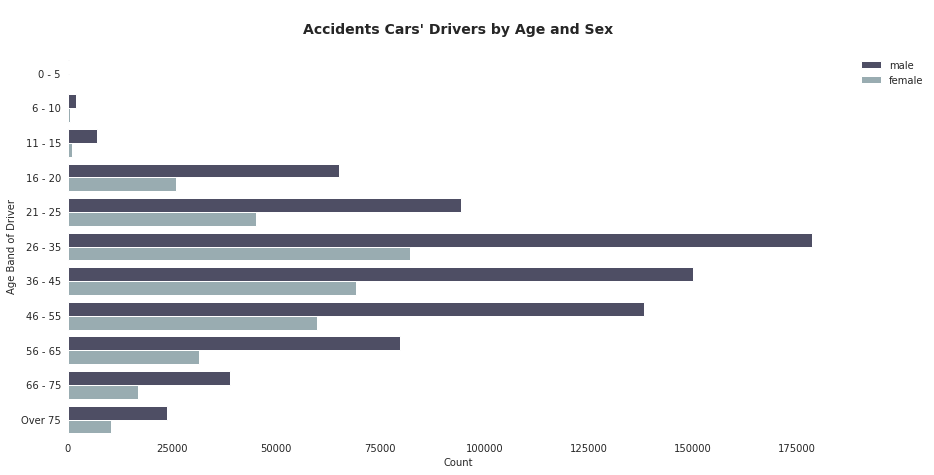

In [37]:
# seaborn barplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=drivers, palette='bone')
ax.set_title('\nAccidents Cars\' Drivers by Age and Sex\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 4. Modeling the Data
<a id='4. Modeling the Data'></a>

#### 4.1. Preparing the Data 
<a id='4.1. Preparing the Data'></a>

In [38]:
# combine the accidents with the vehicles table
accidents_vehicles = pd.merge(accidents, vehicles, on='Accident_Index')
df_model = accidents_vehicles[['Accident_Severity', 'Day_of_Week', 'Road_Type', 'Speed_limit', 
                         'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
                         'Urban_or_Rural_Area', 'Age_of_Driver', 'Sex_of_Driver',
                         'Age_of_Vehicle', 'Engine_Capacity_(CC)']]

In [39]:
# drop missing values
df = df_model.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893093 entries, 0 to 893092
Data columns (total 12 columns):
Accident_Severity          893093 non-null int64
Day_of_Week                893093 non-null int64
Road_Type                  893093 non-null int64
Speed_limit                893093 non-null float64
Light_Conditions           893093 non-null int64
Weather_Conditions         893093 non-null int64
Road_Surface_Conditions    893093 non-null int64
Urban_or_Rural_Area        893093 non-null int64
Age_of_Driver              893093 non-null float64
Sex_of_Driver              893093 non-null int64
Age_of_Vehicle             893093 non-null int64
Engine_Capacity_(CC)       893093 non-null int64
dtypes: float64(2), int64(10)
memory usage: 88.6 MB


In [40]:
#df['Sex_of_Driver'].value_counts()

In [41]:
# drop ???
df.drop(df[(df['Sex_of_Driver']==3)  | (df['Sex_of_Driver']==-1) | \
           (df['Engine_Capacity_(CC)']==-1) | (df['Engine_Capacity_(CC)'] < 100)].index, axis=0, inplace=True)

In [42]:
#df.info()

In [43]:
# cast categorical features to their proper data format
for col in ['Accident_Severity','Day_of_Week', 'Road_Type', 'Speed_limit', 'Light_Conditions', 
            'Weather_Conditions','Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Sex_of_Driver']:
    df[col] = df[col].astype('category')

In [44]:
# define our features 
features = df.drop(['Accident_Severity'], axis=1)

# define our target
target = df[['Accident_Severity']]

# create dummy variables
features = pd.get_dummies(features)

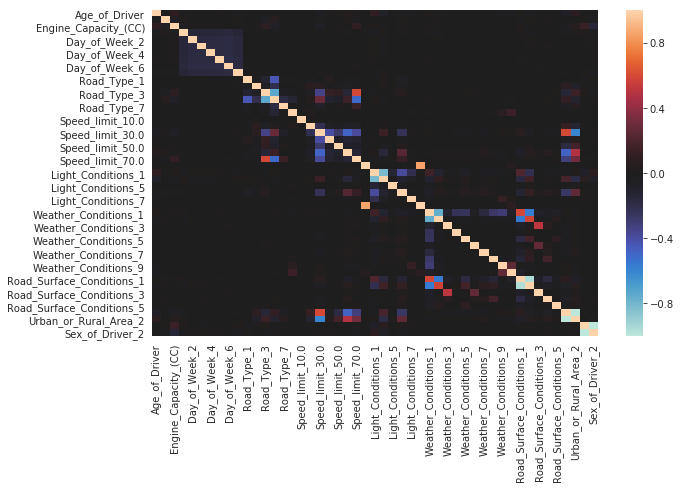

In [45]:
# use heatmap to check for intercorrelation between variables
plt.figure(figsize=(10,6))
sns.heatmap(features.corr(), center=0);

In [46]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm

# import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# import Grid Search
from sklearn.model_selection import GridSearchCV

In [47]:
# split our data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [48]:
# scale our data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 4.2. Random Forest Classifier 
<a id='4.2. Random Forest Classifier'></a>

In [49]:
# instantiate the plain classifier
forest = RandomForestClassifier()

# train
forest.fit(X_train, y_train)

# predict
train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)

# evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest = accuracy_score(y_test, test_preds)
report_forest_1 = classification_report(y_test, test_preds)

print("Plain Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

Plain Random Forest
-------------------------
Training Accuracy: 98.12%
Test Accuracy:     80.73%


In [53]:
print('Classification Report Plain Random Forest: \n', report_forest_1)

Classification Report Plain Random Forest: 
               precision    recall  f1-score   support

           1       0.06      0.02      0.03      1573
           2       0.21      0.10      0.14     18080
           3       0.85      0.94      0.89    108459

   micro avg       0.81      0.81      0.81    128112
   macro avg       0.38      0.35      0.35    128112
weighted avg       0.75      0.81      0.78    128112



In [ ]:
# create grid              
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_features': [5, 7, 9],         
              'max_depth': [5, 8, 10], 
              'min_samples_split': [2, 3, 4]}

# instantiate grid search
forest_grid_search = GridSearchCV(forest, param_grid, cv=3)

# train
forest_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(forest_grid_search.best_params_)

In [50]:
# instantiate random forest with the best found parameters
forest = RandomForestClassifier(n_estimators=80, criterion='gini', max_features=7, 
                                      max_depth=10, min_samples_split=4)

# train
forest.fit(X_train, y_train)

# predict
train_preds = forest.predict(X_train)
test_preds  = forest.predict(X_test)

# evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest  = accuracy_score(y_test, test_preds)
report_forest_2 = classification_report(y_test, test_preds)

print("Tuned Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

Tuned Random Forest
-------------------------
Training Accuracy: 84.96%
Test Accuracy:     84.66%


In [54]:
print('Classification Report Tuned Random Forest: \n', report_forest_2)

Classification Report Tuned Random Forest: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1573
           2       0.50      0.00      0.00     18080
           3       0.85      1.00      0.92    108459

   micro avg       0.85      0.85      0.85    128112
   macro avg       0.45      0.33      0.31    128112
weighted avg       0.79      0.85      0.78    128112



*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 4.3. Support Vector Classification
<a id='4.3. Support Vector Classification'></a>

In [ ]:
# instantiate Support Vector Classification
svm = svm.SVC(kernel='rbf', random_state=4)

# train
svm.fit(X_train, y_train)

# predict
train_preds = svm.predict(X_train)
test_preds = svm.predict(X_test)

# evaluate
train_accuracy_svm = accuracy_score(y_train, train_preds)
test_accuracy_svm = accuracy_score(y_test, test_preds)
report_svm = classification_report(y_test, test_preds)

print("Support Vector Machine")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_svm * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_svm * 100):.4}%")